# Choosing a suburb to stay in Johannesburg

## This notebook seeks to use machine learning, clustering in particular, to analyze profiles of suburbs in Johannesburg and categories them so as to help newcomers to the city of Johannesburg to make better decisions on where they would like to stay. The project considers three factors which are crime rate, school availability and healthcare availability in each suburb. The suburbs are then categorized into three clusters, from best to worst based on crime rate, school availability and healthcare availability.




In [ ]:
#Import all necessary libraries
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

#import cdist
from scipy.spatial.distance import cdist

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import json # library to handle JSON files


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl

import time


print('libraries imported')

Solving environment: done

# All requested packages already installed.

Solving environment: / 

## 1. Let Scrape data from the Wikipedia page to find suburbs in each Region of City of Johannesburg.

Get the Contents to the URL o the Wikipedia Page containing information on City of Johannesburg.

In [3]:
#intialising the url to a variable 'url Joburg'
url_joburg = 'https://en.wikipedia.org/wiki/City_of_Johannesburg_Metropolitan_Municipality'

#Using the function get from the requests library to download the Wikipedia page.
page_joburg  = requests.get(url_joburg)

#The data attribute text is used to extract the XML as a text file string and the result is assigned to a variable called 'data_joburg':
data_joburg = page_joburg.text
print(data_joburg)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>City of Johannesburg Metropolitan Municipality - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"City_of_Johannesburg_Metropolitan_Municipality","wgTitle":"City of Johannesburg Metropolitan Municipality","wgCurRevisionId":910359707,"wgRevisionId":910359707,"wgArticleId":2244836,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Use South African English from May 2012","All Wikipedia articles written in South African English","Use dmy dates from May 2011","Articles with short description","Coordinates on Wikidata","All articles with unsourced statements","Articles with unsourced statements from Jun

Use BeatifulSoup to create a parse tree for 'data_joburg' wich will be used to extract data from the HTML file.

In [4]:
soup = BeautifulSoup(data_joburg,'lxml')

From 'data_joburg' HTML script output, we can see that the contents we need are under the class 'nowraplinks collapsible collapsed navbox-subgroup', so we need to find 'nowraplinks collapsible collapsed navbox-subgroup' in our HTML script.

In [5]:
joburg_table = soup.findAll('table',{'class':'nowraplinks collapsible collapsed navbox-subgroup'})
joburg_table

[<table class="nowraplinks collapsible collapsed navbox-subgroup" style="border-spacing:0"><tbody><tr><th class="navbox-title" colspan="2" scope="col"><div id="Region_A" style="font-size:114%;margin:0 4em">Region A</div></th></tr><tr><td class="navbox-list navbox-odd" colspan="2" style="width:100%;padding:0px"><div style="padding:0em 0.25em">
 <ul><li><a href="/wiki/Airdlin" title="Airdlin">Airdlin</a></li>
 <li><a href="/wiki/Barbeque_Downs" title="Barbeque Downs">Barbeque Downs</a></li>
 <li><a href="/wiki/Barbeque_Downs_Business_Park" title="Barbeque Downs Business Park">Barbeque Downs Business Park</a></li>
 <li><a href="/wiki/Bloubosrand" title="Bloubosrand">Bloubosrand</a></li>
 <li><a href="/wiki/Blue_Hills,_Gauteng" title="Blue Hills, Gauteng">Blue Hills</a></li>
 <li><a href="/wiki/Broadacres,_Gauteng" title="Broadacres, Gauteng">Broadacres</a></li>
 <li><a href="/wiki/Buccleuch,_Gauteng" title="Buccleuch, Gauteng">Buccleuch</a></li>
 <li><a href="/wiki/Carlswald" title="Carls

Create multi-dimensional list containing all elements from the table with a 'li' tag

In [6]:
#multi dimenesional list of elemenst with a 'li' tag.
elements = [] 
for index in range (len(joburg_table)):
    index = index
    elements.append(joburg_table[index].find_all('li'))

elements

[[<li><a href="/wiki/Airdlin" title="Airdlin">Airdlin</a></li>,
  <li><a href="/wiki/Barbeque_Downs" title="Barbeque Downs">Barbeque Downs</a></li>,
  <li><a href="/wiki/Barbeque_Downs_Business_Park" title="Barbeque Downs Business Park">Barbeque Downs Business Park</a></li>,
  <li><a href="/wiki/Bloubosrand" title="Bloubosrand">Bloubosrand</a></li>,
  <li><a href="/wiki/Blue_Hills,_Gauteng" title="Blue Hills, Gauteng">Blue Hills</a></li>,
  <li><a href="/wiki/Broadacres,_Gauteng" title="Broadacres, Gauteng">Broadacres</a></li>,
  <li><a href="/wiki/Buccleuch,_Gauteng" title="Buccleuch, Gauteng">Buccleuch</a></li>,
  <li><a href="/wiki/Carlswald" title="Carlswald">Carlswald</a></li>,
  <li><a href="/wiki/Chartwell,_Gauteng" title="Chartwell, Gauteng">Chartwell</a></li>,
  <li><a href="/wiki/Country_View" title="Country View">Country View</a></li>,
  <li><a href="/wiki/Crowthorne,_Gauteng" title="Crowthorne, Gauteng">Crowthorne</a></li>,
  <li><a href="/wiki/Dainfern" title="Dainfern">Da

 Create lists containing the suburbs in each region.

In [7]:
#Region A
region_a = []
a_region = []
links_a  = []
for a in range (len(elements[0])):
    region_a.append(elements[0][a].get_text())
    links_a.append(elements[0][a].find('a', href=True).get('href').replace('/wiki/', ''))
    a_region.append('Region A')
    
#Region B
region_b = []
b_region = []
links_b  = []
for b in range (len(elements[1])):
    region_b.append(elements[1][b].get_text()) 
    links_b.append(elements[1][b].find('a', href=True).get('href').replace('/wiki/', ''))
    b_region.append('Region B')

#Region C
region_c = []
c_region = []
links_c = [] 
for c in range (len(elements[2])):
    region_c.append(elements[2][c].get_text())
    links_c.append(elements[2][c].find('a', href=True).get('href').replace('/wiki/', ''))
    c_region.append('Region C')

#Region D
region_d = []
d_region = []
links_d = []
for d in range (len(elements[3])):
    region_d.append(elements[3][d].get_text()) 
    links_d.append(elements[3][d].find('a', href=True).get('href').replace('/wiki/', ''))
    d_region.append('Region D')
    
#Region E
region_e = []
e_region = []
links_e = []
for e in range (len(elements[4])):
    region_e.append(elements[4][e].get_text()) 
    links_e.append(elements[4][e].find('a', href=True).get('href').replace('/wiki/', ''))
    e_region.append('Region E')
    
#Region F
region_f = []
f_region = []
links_f = []
for f in range (len(elements[5])):
    region_f.append(elements[5][f].get_text()) 
    links_f.append(elements[5][f].find('a', href=True).get('href').replace('/wiki/', ''))
    f_region.append('Region F')
    
#Region G
region_g = []
g_region = []
links_g = []
for g in range (len(elements[6])):
    region_g.append(elements[6][g].get_text()) 
    links_g.append(elements[6][g].find('a', href=True).get('href').replace('/wiki/', ''))
    g_region.append('Region G')

Create  a dataframe with 2 columns for each Region and suburbs per region.

In [8]:
#Create an empty dataframe
df_joburg = pd.DataFrame()

#--------------Add suburbs per region to new dataframe using a dictionary------------------

#Region A
a_dic = {'Region': a_region, 'Suburb': region_a, 'Links': links_a}
df_joburg = pd.DataFrame(a_dic) 

#Region B
b_dic = {'Region': b_region, 'Suburb': region_b, 'Links': links_b}
for region, suburb, link in zip (b_dic['Region'], b_dic['Suburb'], b_dic['Links']):
    df_joburg = df_joburg.append({'Region': region, 'Suburb': suburb, 'Links': link}, ignore_index=True)
    
#Region C
c_dic = {'Region': c_region, 'Suburb': region_c, 'Links': links_c}
for region, suburb, link in zip (c_dic['Region'], c_dic['Suburb'], c_dic['Links']):
    df_joburg = df_joburg.append({'Region': region, 'Suburb': suburb, 'Links': link}, ignore_index=True)
    
#Region D
d_dic = {'Region': d_region, 'Suburb': region_d, 'Links': links_d}
for region, suburb, link in zip (d_dic['Region'], d_dic['Suburb'], d_dic['Links']):
    df_joburg = df_joburg.append({'Region': region, 'Suburb': suburb, 'Links': link}, ignore_index=True)
    
#Region E
e_dic = {'Region': e_region, 'Suburb': region_e, 'Links': links_e}
for region, suburb, link in zip (e_dic['Region'], e_dic['Suburb'], e_dic['Links']):
    df_joburg = df_joburg.append({'Region': region, 'Suburb': suburb, 'Links': link}, ignore_index=True)
    
#Region F
f_dic = {'Region': f_region, 'Suburb': region_f, 'Links': links_f}
for region, suburb, link in zip (f_dic['Region'], f_dic['Suburb'], f_dic['Links']):
    df_joburg = df_joburg.append({'Region': region, 'Suburb': suburb, 'Links': link}, ignore_index=True)
    
#Region G
g_dic = {'Region': g_region, 'Suburb': region_g, 'Links': links_g}
for region, suburb, link in zip (g_dic['Region'], g_dic['Suburb'], g_dic['Links']):
    df_joburg = df_joburg.append({'Region': region, 'Suburb': suburb, 'Links': link}, ignore_index=True)
    
df_joburg

,Region,Suburb,Links
0,Region A,Airdlin,Airdlin
1,Region A,Barbeque Downs,Barbeque_Downs
2,Region A,Barbeque Downs Business Park,Barbeque_Downs_Business_Park
3,Region A,Bloubosrand,Bloubosrand
4,Region A,Blue Hills,"Blue_Hills,_Gauteng"
5,Region A,Broadacres,"Broadacres,_Gauteng"
6,Region A,Buccleuch,"Buccleuch,_Gauteng"
7,Region A,Carlswald,Carlswald
8,Region A,Chartwell,"Chartwell,_Gauteng"
9,Region A,Country View,Country_View


Let us check the size of our dataframe.

In [9]:
df_joburg.shape

(359, 3)

## 2. Lets now  scrape data from Crime Stats SA to get crimes rates in each suburb.

In [10]:
#intialising the url to a variable 'url_crimestats'
url_crimestats = 'https://www.crimestatssa.com/provinceselect.php?sortorder=&ShowProvince=Gauteng&go=1&Precincts%5B%5D=273&Precincts%5B%5D=155&Precincts%5B%5D=290&Precincts%5B%5D=232&Precincts%5B%5D=184&Precincts%5B%5D=255&Precincts%5B%5D=1119&Precincts%5B%5D=256&Precincts%5B%5D=348&Precincts%5B%5D=278&Precincts%5B%5D=258&Precincts%5B%5D=279&Precincts%5B%5D=194&Precincts%5B%5D=302&Precincts%5B%5D=293&Precincts%5B%5D=235&Precincts%5B%5D=263&Precincts%5B%5D=182&Precincts%5B%5D=185&Precincts%5B%5D=289&Precincts%5B%5D=266&Precincts%5B%5D=238&Precincts%5B%5D=137&Precincts%5B%5D=249&Precincts%5B%5D=303&Precincts%5B%5D=328&Precincts%5B%5D=318&Precincts%5B%5D=284&Precincts%5B%5D=1113&Precincts%5B%5D=271&Precincts%5B%5D=1114&Precincts%5B%5D=121&Precincts%5B%5D=316&Precincts%5B%5D=311&Precincts%5B%5D=315&Precincts%5B%5D=241&Precincts%5B%5D=172&Precincts%5B%5D=157&Precincts%5B%5D=294&Precincts%5B%5D=286&Precincts%5B%5D=314&Precincts%5B%5D=198&Precincts%5B%5D=239&Precincts%5B%5D=337&Precincts%5B%5D=240&Precincts%5B%5D=257&Precincts%5B%5D=338&Precincts%5B%5D=144&Precincts%5B%5D=188&Precincts%5B%5D=276&Precincts%5B%5D=132&Precincts%5B%5D=339&Precincts%5B%5D=203&Precincts%5B%5D=170&Precincts%5B%5D=261&Precincts%5B%5D=225&Precincts%5B%5D=212&Precincts%5B%5D=275&Precincts%5B%5D=265&Precincts%5B%5D=268&Precincts%5B%5D=251&Precincts%5B%5D=150&Precincts%5B%5D=307&Precincts%5B%5D=1122&Precincts%5B%5D=228&Precincts%5B%5D=295&Precincts%5B%5D=325&Precincts%5B%5D=288&Precincts%5B%5D=216&Precincts%5B%5D=298&Precincts%5B%5D=267&Precincts%5B%5D=187&Precincts%5B%5D=301&Precincts%5B%5D=313&Precincts%5B%5D=237&Precincts%5B%5D=134&Precincts%5B%5D=201&Precincts%5B%5D=142&Precincts%5B%5D=214&Precincts%5B%5D=171&Precincts%5B%5D=168&Precincts%5B%5D=270&Precincts%5B%5D=343&Precincts%5B%5D=211&Precincts%5B%5D=1132&Precincts%5B%5D=297&Precincts%5B%5D=283&Precincts%5B%5D=213&Precincts%5B%5D=281&Precincts%5B%5D=324&Precincts%5B%5D=223&Precincts%5B%5D=247&Precincts%5B%5D=1134&Precincts%5B%5D=210&Precincts%5B%5D=245&Precincts%5B%5D=334&Precincts%5B%5D=274&Precincts%5B%5D=244&Precincts%5B%5D=181&Precincts%5B%5D=174&Precincts%5B%5D=151&Precincts%5B%5D=180&Precincts%5B%5D=264&Precincts%5B%5D=280&Precincts%5B%5D=230&Precincts%5B%5D=218&Precincts%5B%5D=226&Precincts%5B%5D=253&Precincts%5B%5D=360&Precincts%5B%5D=272&Precincts%5B%5D=131&Precincts%5B%5D=246&Precincts%5B%5D=248&Precincts%5B%5D=234&Precincts%5B%5D=222&Precincts%5B%5D=229&Precincts%5B%5D=342&Precincts%5B%5D=353&Precincts%5B%5D=177&Precincts%5B%5D=158&Precincts%5B%5D=254&Precincts%5B%5D=140&Precincts%5B%5D=282&Precincts%5B%5D=179&Precincts%5B%5D=219&Precincts%5B%5D=119&Precincts%5B%5D=215&Precincts%5B%5D=1139&Precincts%5B%5D=354&Precincts%5B%5D=309&Precincts%5B%5D=310&Precincts%5B%5D=1140&Precincts%5B%5D=352&Precincts%5B%5D=359&Precincts%5B%5D=173&Precincts%5B%5D=308&Precincts%5B%5D=323&Precincts%5B%5D=209&Precincts%5B%5D=319&Precincts%5B%5D=202&Precincts%5B%5D=169&Precincts%5B%5D=262&Precincts%5B%5D=317&Crimes%5B%5D=Murder&Crimes%5B%5D=Sexual+Offences&Crimes%5B%5D=Attempted+murder&Crimes%5B%5D=Assault+with+the+intent+to+inflict+grievous+bodily+harm&Crimes%5B%5D=Common+assault&Crimes%5B%5D=Common+robbery&Crimes%5B%5D=Robbery+with+aggravating+circumstances&Crimes%5B%5D=Arson&Crimes%5B%5D=Malicious+damage+to+property&Crimes%5B%5D=Burglary+at+non-residential+premises&Crimes%5B%5D=Burglary+at+residential+premises&Crimes%5B%5D=Theft+of+motor+vehicle+and+motorcycle&Crimes%5B%5D=Theft+out+of+or+from+motor+vehicle&Crimes%5B%5D=Stock-theft&Crimes%5B%5D=Illegal+possession+of+firearms+and+ammunition&Crimes%5B%5D=Drug-related+crime&Crimes%5B%5D=Driving+under+the+influence+of+alcohol+or+drugs&Crimes%5B%5D=Sexual+offences+detected+as+a+result+of+police+action&Crimes%5B%5D=All+theft+not+mentioned+elsewhere&Crimes%5B%5D=Commercial+crime&Crimes%5B%5D=Shoplifting&Crimes%5B%5D=Community-reported+serious+crimes&Crimes%5B%5D=Carjacking&Crimes%5B%5D=Truck+hijacking&Crimes%5B%5D=Robbery+at+residential+premises&Crimes%5B%5D=Robbery+at+non-residential+premises&Crimes%5B%5D=Bank+robbery&Crimes%5B%5D=Robbery+of+cash+in+transit&Crimes%5B%5D=TRIO+Crimes&Crimes%5B%5D=Culpable+homicide&Crimes%5B%5D=Public+violence&Crimes%5B%5D=Crimen+injuria&Crimes%5B%5D=Neglect+and+ill-treatment+of+children&Crimes%5B%5D=Abduction&Crimes%5B%5D=Rape&Crimes%5B%5D=Sexual+assault&Crimes%5B%5D=Attempted+sexual+offences&Crimes%5B%5D=Contact+sexual+offences&Years%5B%5D=2018&Submit=Submit'

#Using the function get from the requests library to download the Crime Stats SA page.
crime_joburg  = requests.get(url_crimestats)

#The data attribute text is used to extract the XML as a text file string and the result is assigned to a variable called 'crime_data':
crime_data = crime_joburg.text
print(crime_data)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
	<title>Crime Stats SA - Crime Stats Simplified</title>
  <script type="text/javascript" src="js/jquery.js"></script>
	<script type="text/javascript" src="js/stabs.jquery.js"></script>
	<script type="text/javascript" src="js/visualize/js/excanvas.js"></script>
	<script type="text/javascript" src="js/visualize/js/visualize.jQuery.js"></script>
	<script type="text/javascript" src="js/jwysiwyg/wysiwyg.jquery.js"></script>
	<script type="text/javascript" src="js/accordion.jquery.js"></script>
	<SCRIPT LANGUAGE="Javascript" SRC="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.7.2/Chart.min.js"></SCRIPT>
	<style type="text/css">
		@import "css/global.css";
		@import "js/visualize/css/visualize.css";
		@import "js/jwysiwyg/wysiwyg.css";
@import "css/jquery.toolti

Use BeatifulSoup to create a parse tree for 'crime_data' wich will be used to extract data from the HTML file, which will be then be used for web scraping.

In [11]:
soup_crime = BeautifulSoup(crime_data,'lxml')

From 'crime_data' HTML script output, we can see that the contents we need are under the 'tr' tags with class 'ewTableAltRow' and 'ewTableRow', so we need to find them in our HTML script'

In [12]:
joburg_row = soup_crime.find_all('tr',{'class':'ewTableAltRow'})
joburg_row

[<tr class="ewTableAltRow"><td class="ewRptGrpField1"><a href="precinct.php?id=155">Akasia</a></td><td class="ewRptGrpField1">32</td><td class="ewRptGrpField1">108</td><td class="ewRptGrpField1">54</td><td class="ewRptGrpField1">486</td><td class="ewRptGrpField1">411</td><td class="ewRptGrpField1">267</td><td class="ewRptGrpField1">595</td><td class="ewRptGrpField1">15</td><td class="ewRptGrpField1">413</td><td class="ewRptGrpField1">121</td><td class="ewRptGrpField1">877</td><td class="ewRptGrpField1">244</td><td class="ewRptGrpField1">428</td><td class="ewRptGrpField1">18</td><td class="ewRptGrpField1">18</td><td class="ewRptGrpField1">193</td><td class="ewRptGrpField1">62</td><td class="ewRptGrpField1">0</td><td class="ewRptGrpField1">1408</td><td class="ewRptGrpField1">213</td><td class="ewRptGrpField1">181</td><td class="ewRptGrpField1">5871</td><td class="ewRptGrpField1">82</td><td class="ewRptGrpField1">7</td><td class="ewRptGrpField1">106</td><td class="ewRptGrpField1">81</td><

Get contents of second 'tr' tag.

In [13]:
joburg_row1 = soup_crime.find_all('tr',{'class':'ewTableRow'})
joburg_row1

[<tr class="ewTableRow"><td class="ewRptGrpField1"><a href="precinct.php?id=273">Actonville</a></td><td class="ewRptGrpField1">24</td><td class="ewRptGrpField1">43</td><td class="ewRptGrpField1">13</td><td class="ewRptGrpField1">248</td><td class="ewRptGrpField1">94</td><td class="ewRptGrpField1">41</td><td class="ewRptGrpField1">102</td><td class="ewRptGrpField1">6</td><td class="ewRptGrpField1">136</td><td class="ewRptGrpField1">41</td><td class="ewRptGrpField1">183</td><td class="ewRptGrpField1">42</td><td class="ewRptGrpField1">113</td><td class="ewRptGrpField1">0</td><td class="ewRptGrpField1">25</td><td class="ewRptGrpField1">319</td><td class="ewRptGrpField1">152</td><td class="ewRptGrpField1">0</td><td class="ewRptGrpField1">203</td><td class="ewRptGrpField1">33</td><td class="ewRptGrpField1">56</td><td class="ewRptGrpField1">1378</td><td class="ewRptGrpField1">13</td><td class="ewRptGrpField1">2</td><td class="ewRptGrpField1">13</td><td class="ewRptGrpField1">16</td><td class=

### Next process is to extract the number of each crime in each row for both set roes. We will start with first row and replicate the code on the second row and then combine the rows.

##### First row:

Extract cotents with 'td' tag of class 'ewRptGrpField1'

In [14]:
joburg_data = soup_crime.find_all('td',{'class':'ewRptGrpField1'})
joburg_data

[<td class="ewRptGrpField1"><a href="precinct.php?id=273">Actonville</a></td>,
 <td class="ewRptGrpField1">24</td>,
 <td class="ewRptGrpField1">43</td>,
 <td class="ewRptGrpField1">13</td>,
 <td class="ewRptGrpField1">248</td>,
 <td class="ewRptGrpField1">94</td>,
 <td class="ewRptGrpField1">41</td>,
 <td class="ewRptGrpField1">102</td>,
 <td class="ewRptGrpField1">6</td>,
 <td class="ewRptGrpField1">136</td>,
 <td class="ewRptGrpField1">41</td>,
 <td class="ewRptGrpField1">183</td>,
 <td class="ewRptGrpField1">42</td>,
 <td class="ewRptGrpField1">113</td>,
 <td class="ewRptGrpField1">0</td>,
 <td class="ewRptGrpField1">25</td>,
 <td class="ewRptGrpField1">319</td>,
 <td class="ewRptGrpField1">152</td>,
 <td class="ewRptGrpField1">0</td>,
 <td class="ewRptGrpField1">203</td>,
 <td class="ewRptGrpField1">33</td>,
 <td class="ewRptGrpField1">56</td>,
 <td class="ewRptGrpField1">1378</td>,
 <td class="ewRptGrpField1">13</td>,
 <td class="ewRptGrpField1">2</td>,
 <td class="ewRptGrpField1"

Separate the elements of the result set per neighborhood.

In [15]:
#create empty lists
neighborhood = []
total_crimes = []

no_total_crimes = 0
no_crimes = 39  #number of crime categoties.
iterator = 1
index = 0

#create a while loop to iterate through 'joburg_data'
while (index < len(joburg_data)):
    neighborhood.append(joburg_data[index].get_text()) #add suburbs to the list
    
    while (iterator < no_crimes): #while loop to find total crimes for each suburb.
        if(joburg_data[iterator].get_text() != ''):
            no_total_crimes = int(joburg_data[iterator].get_text()) + no_total_crimes #add crimes for each suburb.
        iterator += 1
    
    total_crimes.append(no_total_crimes) #add total crimes for a surburb to the 'totals_crime' list
    no_total_crimes = 0 #reset the total crimes counter for each suburb, so that it can start at zero for the next suburb.
       
    index = index + 39 #add 39 to to go to index for next suburb.
    no_crimes += 39 #update the number of crime categories to match to be in sync with thed 'index' 
    iterator += 1
neighborhood[0:5]

['Actonville', 'Akasia', 'Alberton', 'Alexandra', 'Atteridgeville']

Create a dataframe matching neighborhood with total crime. 

In [16]:
dict_neigh = {'Suburb': neighborhood, 'Total_Crimes': total_crimes}
df_crime = pd.DataFrame(dict_neigh)
print(df_crime.shape)
df_crime.head()

(143, 2)


,Suburb,Total_Crimes
0,Actonville,3381
1,Akasia,12671
2,Alberton,10966
3,Alexandra,12104
4,Atteridgeville,11349


## 3. Lets compare the suburbs in total crimes dataframe and suburbs per region dataframe and drop the suburbs that do not appear in both.

In [17]:
df_merged_subs =  pd.merge(df_crime, df_joburg, on = 'Suburb', how = 'outer')
df_merged_subs

,Suburb,Total_Crimes,Region,Links
0,Actonville,3381.0,NaN,NaN
1,Akasia,12671.0,NaN,NaN
2,Alberton,10966.0,NaN,NaN
3,Alexandra,12104.0,Region E,"Alexandra,_Gauteng"
4,Atteridgeville,11349.0,NaN,NaN
5,Bedfordview,6089.0,NaN,NaN
6,Bekkersdal,3545.0,NaN,NaN
7,Benoni,12775.0,NaN,NaN
8,Boipatong,1557.0,NaN,NaN
9,Boksburg,6855.0,NaN,NaN


### Drop rows that have NaN

In [18]:
df_sub_crimes = df_merged_subs.dropna()
df_total_crimes = df_sub_crimes.reset_index(drop = True)
df_total_crimes.head()

,Suburb,Total_Crimes,Region,Links
0,Alexandra,12104.0,Region E,"Alexandra,_Gauteng"
1,Bramley,7357.0,Region E,"Bramley,_Gauteng"
2,Brixton,8290.0,Region B,"Brixton,_Gauteng"
3,Diepkloof,10179.0,Region D,Diepkloof
4,Diepsloot,9723.0,Region A,Diepsloot


Find the size of the new dataframe

In [19]:
df_total_crimes.shape

(29, 4)

### Next is to get the coordinates of the suburbs

In [20]:
# make  a for loop to find the coordinates of each suburb based on the wikipedia link of the page

#define dataframe for coordinates
df_cordinates = pd.DataFrame(pd.np.empty((0, 2)))
df_cordinates.columns = ['lat', 'lon']

df_cordinates_final = pd.DataFrame(pd.np.empty((0, 2)))
df_cordinates_final.columns = ['lat', 'lon']

for index in range (df_total_crimes.index.size):
    sub_url = 'https://en.wikipedia.org/w/api.php?action=query&prop=coordinates&titles='+df_sub_crimes.iloc[index, 3]+'&format=json' #wikepedia API to get coordinates
    results  = requests.get(sub_url).json() # convert the HTMl format to JSON
    suburbs_1 = results['query']['pages'] 
    thePageId = list(suburbs_1.keys()) #convert the dictionary of keys to a list so the keys object can be indexable, such tha we get the PAGEID.
    suburbs_2 = results['query']['pages'][thePageId[0]]['coordinates']
    flat_suburbs = json_normalize(suburbs_2) # flatten JSON
    del flat_suburbs['globe']
    del flat_suburbs['primary']
    
    df_cordinates= pd.concat([df_cordinates, flat_suburbs], ignore_index=True)
df_cordinates.head()

,lat,lon
0,-26.103833,28.096167
1,-26.124167,28.081667
2,-26.183333,28.000000
3,-26.249000,27.946000
4,-25.934722,28.012500


#### Merge the coordinates dataframe with the 'df_sub_crimes' dataframe

In [21]:
df_joburg_subs = pd.concat([df_total_crimes, df_cordinates], axis = 1)
df_joburg_subs.head()

,Suburb,Total_Crimes,Region,Links,lat,lon
0,Alexandra,12104.0,Region E,"Alexandra,_Gauteng",-26.103833,28.096167
1,Bramley,7357.0,Region E,"Bramley,_Gauteng",-26.124167,28.081667
2,Brixton,8290.0,Region B,"Brixton,_Gauteng",-26.183333,28.000000
3,Diepkloof,10179.0,Region D,Diepkloof,-26.249000,27.946000
4,Diepsloot,9723.0,Region A,Diepsloot,-25.934722,28.012500


## 4. Now Lets Johannesburg Suburbs to find which suburb is best for moving in considering crime rate, school availability and healthcare availability.

### Lets have a map of Joburg with the suburbs superimposed on top.  Use geopy library to get the latitude and longitude values of Toronto.

In [22]:
address = 'Johannesburg'

geolocator = Nominatim(user_agent="jb_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Johannessburg are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Johannessburg are -26.205, 28.049722.


#### Create a map of Joburg with suburbs superimposed on top.

In [23]:
# create map of Joburg using latitude and longitude values
map_joburg  = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, region, suburb in zip(df_joburg_subs['lat'], df_joburg_subs['lon'], df_joburg_subs['Region'], df_joburg_subs['Suburb']):
    label = '{}, {}'.format(region, suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_joburg)  
    
map_joburg

We are going to start utilizing the Foursquare API to explore the suburbs and rate them.

#### Define Foursquare Credentials and Version

In [24]:
CLIENT_ID = '3YZTBSEGLZ3B1WK4PQKUVQXV1ONAYUMIFQ5WXKGYQQGPTGYJ' # your Foursquare ID
CLIENT_SECRET = '2FK3YLFOZ5WMK5JY2ZJUOQAHSJ4H2ZDUILKHTQ4UEO10KK33' # your Foursquare Secret
VERSION = '20190630' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3YZTBSEGLZ3B1WK4PQKUVQXV1ONAYUMIFQ5WXKGYQQGPTGYJ
CLIENT_SECRET:2FK3YLFOZ5WMK5JY2ZJUOQAHSJ4H2ZDUILKHTQ4UEO10KK33


### We are going to  explore the first suburb in our dataframe.

Let's get the name of the first suburb

In [25]:
df_joburg_subs.loc[0, 'Suburb']

'Alexandra'

Get the suburbs's latitude and longitude values.

In [26]:
suburb_latitude = df_joburg_subs.loc[0, 'lat'] # suburb latitude value
suburb_longitude = df_joburg_subs.loc[0, 'lon'] # suburb longitude value

suburb_name = df_joburg_subs.loc[0, 'Suburb'] # suburb name

print('Latitude and longitude values of {} are {}, {}.'.format(suburb_name, 
                                                               suburb_latitude, 
                                                               suburb_longitude))

Latitude and longitude values of Alexandra are -26.10383333, 28.09616667.


#### Now lets get the number of schools in Alexandra within 2000 meter radius.

First, Let's create the GET request URL. 

In [27]:
LIMIT = 100
radius = 2000
VERSION = '20190502'
categoryID = '4bf58dd8d48988d13d941735,4f4533804b9074f6e4fb0105,4f4533814b9074f6e4fb0106,52e81612bcbc57f1066b7a46,4f4533814b9074f6e4fb0107,52e81612bcbc57f1066b7a45' #limiting search results to only pre-schoo, primary school and high school
url  = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET,  VERSION, suburb_latitude, suburb_longitude, radius, LIMIT, categoryID)
url

'https://api.foursquare.com/v2/venues/search?client_id=3YZTBSEGLZ3B1WK4PQKUVQXV1ONAYUMIFQ5WXKGYQQGPTGYJ&client_secret=2FK3YLFOZ5WMK5JY2ZJUOQAHSJ4H2ZDUILKHTQ4UEO10KK33&v=20190502&ll=-26.10383333,28.09616667&radius=2000&limit=100&categoryId=4bf58dd8d48988d13d941735,4f4533804b9074f6e4fb0105,4f4533814b9074f6e4fb0106,52e81612bcbc57f1066b7a46,4f4533814b9074f6e4fb0107,52e81612bcbc57f1066b7a45'

Sent the GET request and examine the result.

In [28]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d548d7de97dfb002cdb8504'},
 'response': {'venues': [{'id': '51e79cee498e9245ae6d9d50',
    'name': 'Realogile High School',
    'location': {'lat': -26.105095,
     'lng': 28.100362,
     'labeledLatLngs': [{'label': 'display',
       'lat': -26.105095,
       'lng': 28.100362}],
     'distance': 442,
     'cc': 'ZA',
     'country': 'iNingizimu Afrika',
     'formattedAddress': ['iNingizimu Afrika']},
    'categories': [{'id': '4bf58dd8d48988d13d941735',
      'name': 'High School',
      'pluralName': 'High Schools',
      'shortName': 'High School',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1565822334',
    'hasPerk': False},
   {'id': '4c9484c138dd8cfaf7cac962',
    'name': 'Minerva High School',
    'location': {'address': 'London Road',
     'lat': -26.113726612247607,
     'lng': 28.10010310622834,
     'labeledLatLngs': [{'label

Clean the json and structure into a pandas dataframe

In [29]:
schools = results['response']['venues']
    
flat_schools = json_normalize(schools) # flatten JSON
flat_schools

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,51e79cee498e9245ae6d9d50,NaN,ZA,NaN,iNingizimu Afrika,442,[iNingizimu Afrika],"[{'label': 'display', 'lat': -26.105095, 'lng'...",-26.105095,28.100362,NaN,Realogile High School,v-1565822334
1,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4c9484c138dd8cfaf7cac962,London Road,ZA,Sandton,iNingizimu Afrika,1169,"[London Road, Sandton, iNingizimu Afrika]","[{'label': 'display', 'lat': -26.1137266122476...",-26.113727,28.100103,IGauteng,Minerva High School,v-1565822334
2,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,503b2833e4b08256fc07341b,NaN,ZA,Alexandra,iNingizimu Afrika,1032,"[Alexandra, iNingizimu Afrika]","[{'label': 'display', 'lat': -26.111714, 'lng'...",-26.111714,28.101610,IGauteng,Emfundisweni Primary School,v-1565822334
3,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,504d8179e4b05ebf6e514b31,Alexandra,ZA,NaN,iNingizimu Afrika,1311,"[Alexandra, iNingizimu Afrika]","[{'label': 'display', 'lat': -26.1098011916576...",-26.109801,28.107476,NaN,Bovet Primary School,v-1565822334


Get the total number of schools in Alexandra

In [30]:
schools_alexendra = flat_schools.index.size
schools_alexendra 

4

#### Now lets get the number of health care centres in Alexandra within 2000 meter radius.

In [31]:
categoryID = '4bf58dd8d48988d104941735' #categoryid for all medical health care from Foursqaure API, no limiting,
url_health = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET,  VERSION, suburb_latitude, suburb_longitude, radius, LIMIT, categoryID)
url_health

'https://api.foursquare.com/v2/venues/search?client_id=3YZTBSEGLZ3B1WK4PQKUVQXV1ONAYUMIFQ5WXKGYQQGPTGYJ&client_secret=2FK3YLFOZ5WMK5JY2ZJUOQAHSJ4H2ZDUILKHTQ4UEO10KK33&v=20190502&ll=-26.10383333,28.09616667&radius=2000&limit=100&categoryId=4bf58dd8d48988d104941735'

Sent the GET request and examine the result.

In [32]:
results_health = requests.get(url_health).json()
results_health

{'meta': {'code': 200, 'requestId': '5d548d8fa30619002cca822e'},
 'response': {'venues': [{'id': '5768252d498e7a574d0dedc7',
    'name': 'Alexandra Health Centre And University Clinic',
    'location': {'address': '33 Arkwright Av, Wynberg',
     'lat': -26.11584,
     'lng': 28.09126,
     'labeledLatLngs': [{'label': 'display',
       'lat': -26.11584,
       'lng': 28.09126}],
     'distance': 1423,
     'postalCode': '7800',
     'cc': 'ZA',
     'city': 'Sandton',
     'state': 'IGauteng',
     'country': 'iNingizimu Afrika',
     'formattedAddress': ['33 Arkwright Av, Wynberg',
      'Sandton',
      '7800',
      'iNingizimu Afrika']},
    'categories': [{'id': '4bf58dd8d48988d104941735',
      'name': 'Medical Center',
      'pluralName': 'Medical Centers',
      'shortName': 'Medical',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1565822351',
    'hasPerk': False},
 

Clean the json and structure into a pandas dataframe

In [33]:
health_care = results_health['response']['venues']
flat_health_care = json_normalize(health_care) # flatten JSON
flat_health_care

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5768252d498e7a574d0dedc7,"33 Arkwright Av, Wynberg",ZA,Sandton,iNingizimu Afrika,1423,"[33 Arkwright Av, Wynberg, Sandton, 7800, iNin...","[{'label': 'display', 'lat': -26.11584, 'lng':...",-26.115840,28.091260,7800,IGauteng,Alexandra Health Centre And University Clinic,v-1565822351
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4e7c3db7483bdf8df8c975e5,NaN,ZA,EGoli,iNingizimu Afrika,1494,"[EGoli, 2090, iNingizimu Afrika]","[{'label': 'display', 'lat': -26.1111702840512...",-26.111170,28.108682,2090,IGauteng,East bank clinic,v-1565822351
2,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,516f46dc498e01709cec475c,NaN,ZA,NaN,iNingizimu Afrika,1427,[iNingizimu Afrika],"[{'label': 'display', 'lat': -26.116661, 'lng'...",-26.116661,28.096232,NaN,NaN,Alexandra Health & Community Centre,v-1565822351


Ge the total number of health care facilities in Alexandra

In [34]:
health_alexendra = flat_health_care.index.size
health_alexendra 

3

## Let's Explore other Suburbs in Joburg

#### Let's create a function to repeat the same process to all the neighborhoods in DownTown Toronto

In [35]:
def getSuburbs(names, crimes, regions,latitudes, longitudes, radius = 2000):
    

    suburb_list = []
    total_schools_list = []
    total_healthcare_list = []
    
    for name, crime, region, lat, lng in zip(names,crimes, regions, latitudes, longitudes):
        schools = '4bf58dd8d48988d13d941735,4f4533804b9074f6e4fb0105,4f4533814b9074f6e4fb0106,52e81612bcbc57f1066b7a46,4f4533814b9074f6e4fb0107,52e81612bcbc57f1066b7a45'
        healthcare = '4bf58dd8d48988d104941735'
        # create the API request URL for schools
        url_school = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            schools)
        
        # create the API request URL for schools
        url_health = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            healthcare)
        
        # make the GET request for both school and healthcare urls
        results_school = requests.get(url_school).json()
        results_health = requests.get(url_health).json()
      
        try:
            r_school =  results_school['response']['venues']
            r_health  = results_health['response']['venues']
            
        except:
            r_school1 =  results_school['response']
            r_health1  = results_health['response']
       
        #flatten JSONs
        schools = json_normalize(r_school)
        healthcare = json_normalize(r_health)
      
        #total schools and health facilities 
        total_schools = schools.index.size
        total_healthcare = healthcare.index.size
        
        suburb_list.append([(
            name,
            crime,
            region,
            total_schools,
            total_healthcare,
            lat,
            lng
        )])
        
    complete_suburbs = pd.DataFrame([item for suburb_list in suburb_list for item in suburb_list])
    
    complete_suburbs.columns = ['Suburb', 'CrimeRate','Region','Schools', 'Healthcare', 'Latitude', 'Longitude']
       
    return(complete_suburbs)

#### Now let's run the above function on each suburb and create a new dataframe called joburg_suburbs*.

In [36]:
joburg_suburbs = getSuburbs(names = df_joburg_subs['Suburb'],
                            crimes = df_joburg_subs['Total_Crimes'],
                            regions = df_joburg_subs['Region'],
                            latitudes = df_joburg_subs['lat'],
                            longitudes = df_joburg_subs['lon']
                           )
joburg_suburbs.head()

,Suburb,CrimeRate,Region,Schools,Healthcare,Latitude,Longitude
0,Alexandra,12104.0,Region E,4,3,-26.103833,28.096167
1,Bramley,7357.0,Region E,8,22,-26.124167,28.081667
2,Brixton,8290.0,Region B,4,42,-26.183333,28.000000
3,Diepkloof,10179.0,Region D,3,14,-26.249000,27.946000
4,Diepsloot,9723.0,Region A,2,0,-25.934722,28.012500


#### Let's analyze each region then we will analyze each suburb. 

In [37]:
df_regions  = joburg_suburbs.drop(['Suburb' , 'Latitude', 'Longitude'], axis='columns')
df_regions.head()

,CrimeRate,Region,Schools,Healthcare
0,12104.0,Region E,4,3
1,7357.0,Region E,8,22
2,8290.0,Region B,4,42
3,10179.0,Region D,3,14
4,9723.0,Region A,2,0


Group the results by 'Region' and perform a sum

In [38]:
grouped_regions = df_regions.groupby('Region').sum().reset_index().set_index('Region')
grouped_regions

,CrimeRate,Schools,Healthcare
Region,,,
Region A,46673.0,6,36
Region B,38554.0,44,214
Region C,41652.0,23,73
Region D,67225.0,20,31
Region E,43001.0,31,91
Region F,37195.0,22,96
Region G,25768.0,6,13


Lets visualize the the results as a bar chart.

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


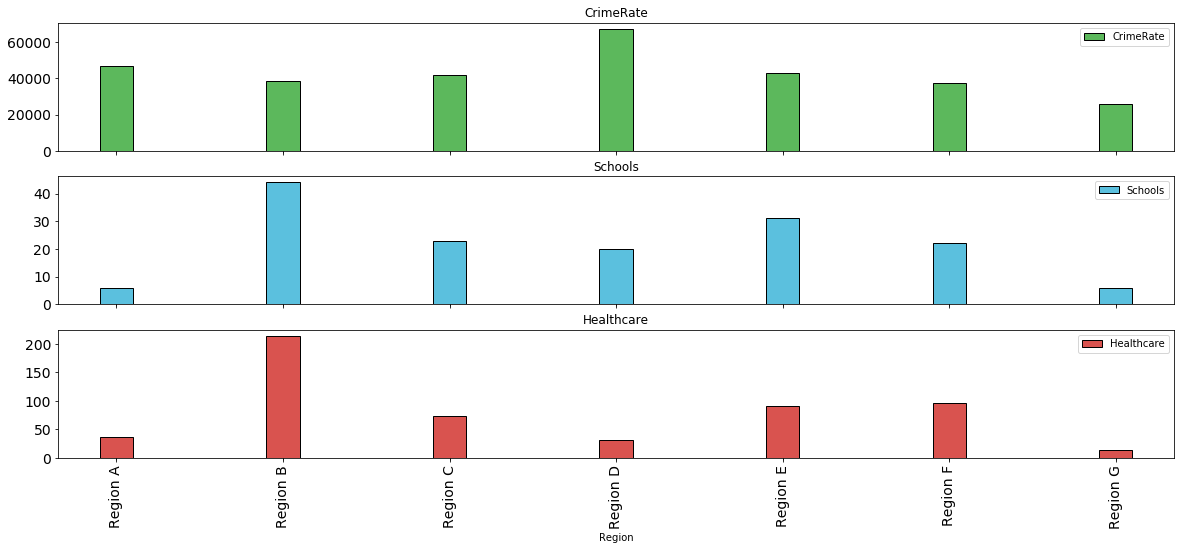

In [39]:
colors = ['#5cb85c', '#5bc0de', '#d9534f']
ax = grouped_regions.plot(kind = 'bar', figsize=(20, 8), width = 0.2, fontsize = 14, colors = colors, edgecolor='black', subplots=True, rot=90)
#ax[1].legend(loc=2)

Now let's analyze each suburb.

In [40]:
analyzed_subs = joburg_suburbs.drop(['Region' , 'Latitude', 'Longitude'], axis='columns')
analyzed_subs.head()

,Suburb,CrimeRate,Schools,Healthcare
0,Alexandra,12104.0,4,3
1,Bramley,7357.0,8,22
2,Brixton,8290.0,4,42
3,Diepkloof,10179.0,3,14
4,Diepsloot,9723.0,2,0


Lets group the table by 'Suburb' and perform a sum

In [41]:
grouped_suburbs = analyzed_subs.groupby('Suburb').sum().reset_index().set_index('Suburb')
grouped_suburbs.tail()

,CrimeRate,Schools,Healthcare
Suburb,,,
Randburg,11062.0,11,43
Roodepoort,14785.0,2,7
Rosebank,3401.0,8,41
Sandton,17282.0,12,46
Yeoville,7164.0,6,45


Lets visualize the the results as a bar chart.

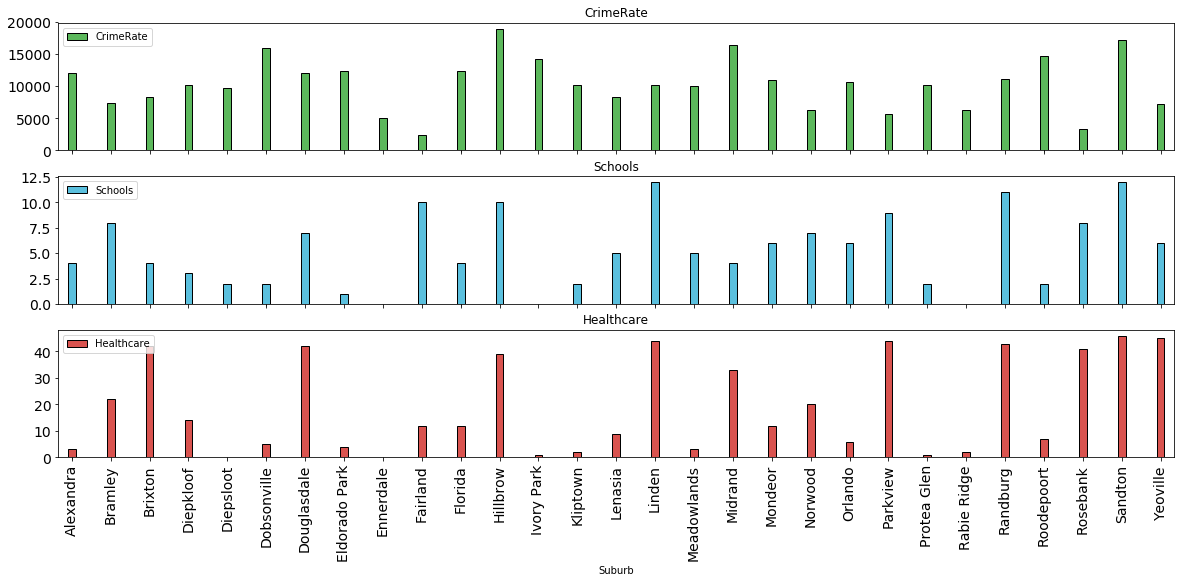

In [42]:
colors = ['#5cb85c', '#5bc0de', '#d9534f']
ax = grouped_suburbs.plot(kind = 'bar', figsize=(20, 8), width = 0.2, fontsize = 14, colors = colors, edgecolor='black', subplots=True, rot=90)

# 5. Lets now  cluster Joburg suburbs.

#### Let's drop the columns which are not going to be used by our clustering algorithm.

In [44]:
df_cluster = joburg_suburbs.drop(['Suburb' ,'Region','Latitude', 'Longitude'], axis='columns')
#convert all columns to 'int 32'
df_cluster.astype('int32').dtypes
df_cluster.dtypes

CrimeRate     float64
Schools         int64
Healthcare      int64
dtype: object

#### Print first five rows of the resulting dataframe 

In [45]:
df_cluster.head()

,CrimeRate,Schools,Healthcare
0,12104.0,4,3
1,7357.0,8,22
2,8290.0,4,42
3,10179.0,3,14
4,9723.0,2,0


#### Now let's normalize the dataset. We use __StandardScaler()__ to normalize our dataset.

In [46]:
from sklearn.preprocessing import StandardScaler
X = df_cluster.values[:,:]
X = np.nan_to_num(X)
Cluster_dataSet = StandardScaler().fit_transform(X)
Cluster_dataSet

array([[ 0.43955855, -0.34692451, -0.92209694],
       [-0.74814163,  0.77094334,  0.16585898],
       [-0.51470488, -0.34692451,  1.31107574],
       [-0.04207677, -0.62639147, -0.29222772],
       [-0.15616804, -0.90585843, -1.09387946],
       [ 1.39232078, -0.90585843, -0.80757527],
       [ 0.41904214,  0.49147638,  1.31107574],
       [ 0.5216242 , -1.18532539, -0.8648361 ],
       [-1.3216004 , -1.46479235, -1.09387946],
       [-1.97262123,  1.32987727, -0.4067494 ],
       [ 0.5091142 , -0.34692451, -0.4067494 ],
       [ 2.16093568,  1.32987727,  1.13929322],
       [ 0.9662299 , -1.46479235, -1.03661862],
       [-0.03006716, -0.90585843, -0.97935778],
       [-0.51945868, -0.06745754, -0.57853191],
       [-0.03907436,  1.88881119,  1.42559741],
       [-0.06984898, -0.06745754, -0.92209694],
       [ 1.52943047, -0.34692451,  0.7957282 ],
       [ 0.17509698,  0.21200942, -0.4067494 ],
       [-1.02311161,  0.49147638,  0.0513373 ],
       [ 0.06876191,  0.21200942, -0.750

#### K-means clustering

#### Lets first use the elbow method to find the optimal value for k

Insatalling Yellow brick to vizualize the elbow method

In [59]:
! pip install yellowbrick

     |████████████████████████████████| 286kB 1.2MB/s eta 0:00:01


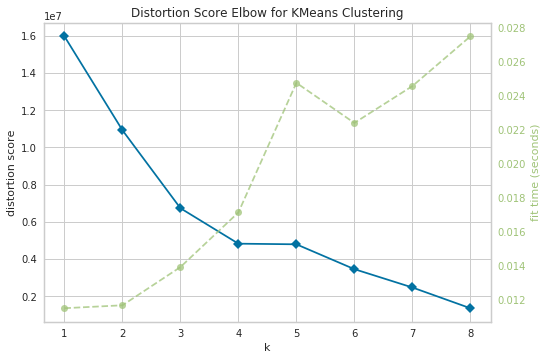

In [61]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,9))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Lets now perform the clustering 

In [62]:
# Lets set the number of clusters to 3
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Cluster_dataSet)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 0, 0, 0, 1, 0, 0, 2], dtype=int32)

#### Let's create a new dataframe that includes the clusters as well.

In [63]:
# add clustering 
joburg_final_df = joburg_suburbs
joburg_final_df.insert(0, 'Cluster Labels', kmeans.labels_)
joburg_final_df.head()

,Cluster Labels,Suburb,CrimeRate,Region,Schools,Healthcare,Latitude,Longitude
0,0,Alexandra,12104.0,Region E,4,3,-26.103833,28.096167
1,2,Bramley,7357.0,Region E,8,22,-26.124167,28.081667
2,2,Brixton,8290.0,Region B,4,42,-26.183333,28.000000
3,0,Diepkloof,10179.0,Region D,3,14,-26.249000,27.946000
4,0,Diepsloot,9723.0,Region A,2,0,-25.934722,28.012500


#### Let's visualize the resulting clusters

In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, region in zip(joburg_suburbs['Latitude'], joburg_suburbs['Longitude'], joburg_suburbs['Suburb'], joburg_suburbs['Cluster Labels'], joburg_suburbs['Region']):
    label = folium.Popup(str(poi) + ', '+  'Cluster'  + str(cluster) + ', '+ str(region), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

AttributeError: 'list' object has no attribute 'rgb2hex'

## Let us now examine the clusters.

Check the centroid values by averaging the features in each cluster.

In [68]:
df_insights = joburg_final_df.drop(['Suburb','Latitude', 'Longitude'], axis='columns')
df_plots = df_insights.groupby('Cluster Labels').mean()
df_plots

,CrimeRate,Schools,Healthcare
Cluster Labels,,,
0,10845.250000,2.750000,5.062500
1,14333.500000,9.333333,41.166667
2,5791.857143,7.428571,32.285714


### Let us visualize and compare the clusters using bar chart.

First lets import matplotlib

In [69]:
 # use the inline backend to generate the plots within the browser
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


Draw bar chart

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


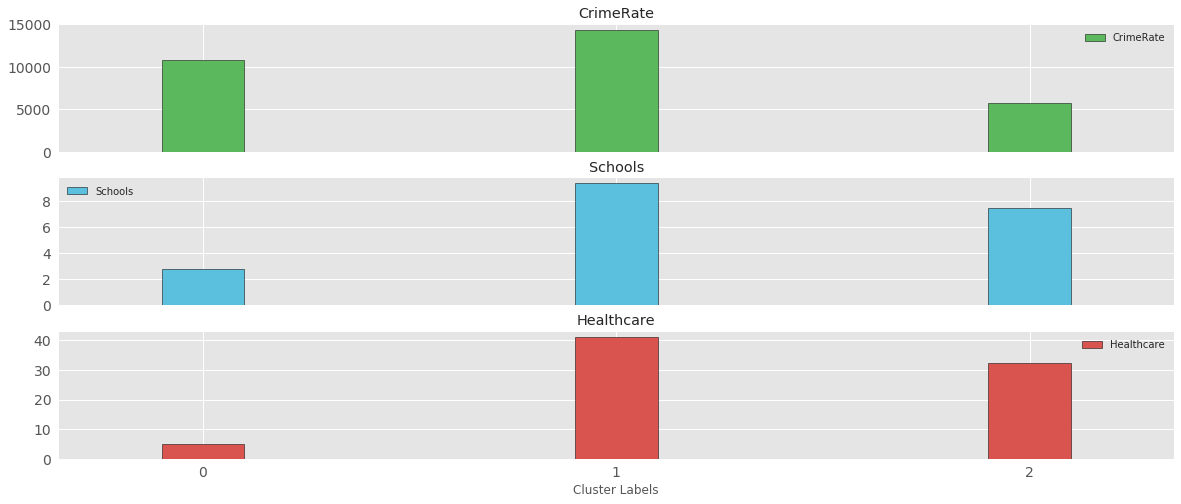

In [70]:
#define artist object
colors = ['#5cb85c', '#5bc0de', '#d9534f']
ax = df_plots.plot(kind = 'bar', figsize=(20, 8), width = 0.2, fontsize = 14, colors = colors, edgecolor='black',subplots=True, rot=0)
ax[1].legend(loc=2)

# 6. Conclusion

From our analysis of the clusters we can see that:

Cluster 0, has very few schools and healthcare facilities. This cluster also has a high crime rate.

Cluster 1, has many schools and healthcare facilities, however this cluster also has the highest crime rate among all the three clusters.

Cluster 2, has a plenty of schools and healthcare facilities, also this cluster has the lowest crime rate among the three clusters. 

There we can say that  for someone looking for a home or place to live based on adequate availability of schools and healthcare facilities and low crime rate, suburbs in cluster 2 are the most suitable.